In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Load and preprocess the dataset
data = pd.read_csv('HistoricalQuotes.csv')

In [5]:
# Extract and clean the 'Close' price column
data['Close'] = data[' Close/Last'].replace({'\$': ''}, regex=True).astype(float)

# Normalize the 'Close' price column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close_normalized'] = scaler.fit_transform(data[['Close']])

In [6]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data['Close_normalized'][:train_size]
test_data = data['Close_normalized'][train_size:]

In [7]:
# Function to create sequences for RNN input
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [8]:
# Create sequences for training and testing
sequence_length = 60
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

In [9]:
# Reshape input data to be 3D for RNN (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer=Adam(), loss='mse')

In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0555 - val_loss: 6.9472e-05
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3299e-04 - val_loss: 8.7734e-05
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4281e-04 - val_loss: 1.4879e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1209e-04 - val_loss: 7.8030e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.7447e-05 - val_loss: 5.1079e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.0205e-05 - val_loss: 2.3911e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.0471e-04 - val_loss: 3.9469e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.9258e-05 - val_loss: 2.8277e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.5658e-05 - val_loss: 2.0491e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9134e-05 - val_loss: 2.5122e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.6010e-05 - 

In [13]:
# Make predictions on the test set
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Transform back to original scale
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


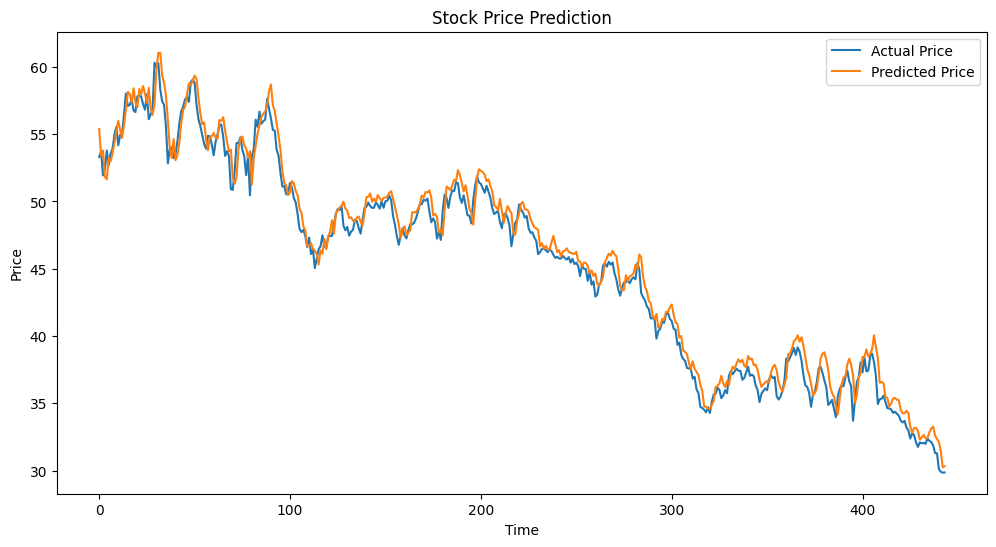

In [14]:
# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Calculate evaluation metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.8546518131771603
Root Mean Squared Error (RMSE): 1.0711109988111387


### Stock Price Prediction Report

#### Objective
The goal of this project was to build a predictive model for stock prices, specifically targeting the "Close" prices. Using historical stock price data, we trained a Recurrent Neural Network (RNN) model to forecast future stock prices and evaluated its performance using error metrics and visualizations.

#### Model Overview
In this approach, we used an RNN, which is a type of neural network particularly good at handling sequential data, like time series or stock prices. Our RNN model has a single RNN layer with 50 units, which captures patterns over a sequence of 60 days, and a Dense layer with one output unit to predict the next day's price.

We trained the model for 50 epochs (iterations over the dataset) with a batch size of 32. The model used Mean Squared Error (MSE) as the loss function, which is typical for regression tasks, and the Adam optimizer, which is widely used for its adaptability in finding optimal parameters during training.

#### Results
The plot shows both the **actual stock prices** and **predicted stock prices** over the test period. The two lines are fairly close to each other, suggesting that the model captured the general trends in stock prices. The model’s performance was evaluated using two key metrics:
- **Mean Absolute Error (MAE):** 0.85
- **Root Mean Squared Error (RMSE):** 1.07

These metrics provide an idea of the average deviation of our predictions from the actual values. An MAE of 0.85 indicates that, on average, our predictions were off by about $0.85 from the true values, while the RMSE of 1.07 indicates that most errors fall within about $1.07.

#### Interpretation and Limitations
The results show that the model is fairly accurate in predicting stock prices, as seen in the close alignment of the actual and predicted lines on the graph. However, there are still some discrepancies between the predicted and actual values. Here are a few reasons for this:

1. **RNN Limitations for Long Sequences**: Although RNNs are good at handling sequences, they may struggle with long-term dependencies. Stock prices are influenced by many factors over long periods, and an RNN might not capture very complex or far-reaching dependencies.

2. **Single Variable Model**: This model only used "Close" prices to make predictions, ignoring other potential factors like trading volume, news, or economic indicators. Real stock prices are affected by many factors outside of historical prices, so using additional data might improve prediction accuracy.

3. **Simple RNN Model**: More advanced models, like Long Short-Term Memory (LSTM) networks or Gated Recurrent Units (GRU), often perform better with time series data because they handle long-term dependencies better than a basic RNN. Using a simple RNN model here might limit performance slightly.

4. **Noise and Volatility in Stock Prices**: Stock prices are naturally volatile and can change due to unpredictable events. No model can perfectly predict stock prices because of this randomness, so some degree of error is inevitable.

5. **Limited Sequence Length**: We used sequences of only 60 days. While this is a reasonable length, experimenting with longer sequences or multiple time steps might allow the model to pick up more trends.

#### Conclusion
Overall, this RNN model provides a reasonable prediction for stock prices based on historical "Close" data. The predictions follow the general trend of the actual prices, and the error metrics (MAE and RMSE) are relatively low, indicating good model performance. However, there is room for improvement. Adding more features, using a more complex architecture like LSTM, or experimenting with different sequence lengths could potentially enhance the model's accuracy. Additionally, understanding that stock prices are influenced by many random factors reminds us to view these predictions with caution. This project highlights how RNNs can be applied to time series forecasting but also emphasizes the challenges in predicting something as complex as stock prices.